#회귀

## 수업에 들어가기 전에(random seed 예제)

In [1]:
# # 사전설치 : pip install numpy
import random
import numpy as np

# Random seed 설정
random.seed(42)
np.random.seed(42)

# 난수 생성
random_number1 = random.random()   # 0이상 1미만의 난수를 생성 (1개 생성)
numpy_array1 = np.random.rand(3)   # 0과 1미만의 난수를 3개 생성 (여러개 생성)

print("첫 번째 실행:")
print("Python random:", random_number1)
print("NumPy array:", numpy_array1)

첫 번째 실행:
Python random: 0.6394267984578837
NumPy array: [0.37454012 0.95071431 0.73199394]


In [2]:
# 다시 실행 (random seed 설정 X)
random_number2 = random.random()
numpy_array2 = np.random.rand(3)

print("\n두 번째 실행 (seed 설정 X):")
print("Python random:", random_number2)
print("NumPy array:", numpy_array2)


두 번째 실행 (seed 설정 X):
Python random: 0.025010755222666936
NumPy array: [0.59865848 0.15601864 0.15599452]


In [3]:
# Random seed 설정 후 다시 실행
random.seed(42)
np.random.seed(42)

# 난수 생성
random_number3 = random.random()
numpy_array3 = np.random.rand(3)

print("\n세 번째 실행 (seed 설정):")
print("Python random:", random_number3)
print("NumPy array:", numpy_array3)


세 번째 실행 (seed 설정):
Python random: 0.6394267984578837
NumPy array: [0.37454012 0.95071431 0.73199394]


##선형회귀

In [4]:
import os
print(os.getcwd())  # 현재 작업 디렉토리 확인
print(os.listdir())  # 현재 디렉토리의 파일 목록 확인

c:\workspace\hit_ml_dl\course\source
['api_example.ipynb', 'bike.py', 'cosine_sim.pickle', 'dl.ipynb', 'dl2.ipynb', 'EDA.ipynb', 'fineTuning.ipynb', 'font_test(includingmac).ipynb', 'heart.ipynb', 'langchainDBV05.ipynb', 'llm.ipynb', 'llm2.ipynb', 'ml.ipynb', 'ml2.ipynb', 'movies.pickle', 'predict_pm_10.ipynb', 'pythonBasic01.ipynb', 'pythonBasic02.ipynb', 'pythonFunction(dbconn).py', 'pythonFunction01.ipynb', 'pythonFunction02.ipynb', 'streamlit_airpollution.ipynb', 'streamlit_diabetes.ipynb', 'streamlit_diabetes.py', 'streamlit_iris.ipynb', 'streamlit_iris.py', 'streamlit_left.py', 'streamlit_movie.ipynb', 'webCrawling.ipynb']


In [5]:
# 사전설치 : pip install numpy scikit-learn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random

# 재현성(난수가 동일한 순서대로 출력)을 위해 random seed 설정
# random.seed(42)
# np.random.seed(42)

# 데이터 준비
X = np.array([[1], [2], [3], [4], [5]])  # 독립 변수
y = np.array([2, 4, 5, 4, 5])  # 종속 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
predictions = model.predict(X_test)

# 결과 출력
print("학습 데이터 크기:", X_train.shape[0])
print("테스트 데이터 크기:", X_test.shape[0])
print("\n모델 계수:")
print("기울기 (slope):", model.coef_[0])

print("절편 (intercept):", model.intercept_)
print("\n테스트 세트 실제 값:", y_test)
print("테스트 세트 예측 값:", predictions)
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, predictions))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, predictions))

학습 데이터 크기: 3
테스트 데이터 크기: 2

모델 계수:
기울기 (slope): 0.7857142857142857
절편 (intercept): 1.5714285714285716

테스트 세트 실제 값: [4 5]
테스트 세트 예측 값: [3.14285714 5.5       ]

모델 성능:
R² 점수: -0.9693877551020396
평균 제곱 오차 (MSE): 0.4923469387755099


In [6]:
# 어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('dataset/diabetes.csv')

# 데이터 확인
print("데이터셋 크기:", df.shape)
print("\n처음 5개 행:")
print(df.head())
print("\n기술통계:")
print(df.describe())

# 독립변수(X)와 종속변수(y) 분리
X = df.drop('Outcome', axis=1)  # Outcome을 제외한 모든 특성
y = df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, y_pred))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred))
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred))

# 특성 중요도 분석
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n특성 중요도:")
print(feature_importance)

# 시각화: 특성 중요도
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# 시각화: 실제값 vs 예측값
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/diabetes.csv'

## 다중선형회귀

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 샘플 데이터 생성
# 공부 시간(X1)과 과외 시간(X2)에 따른 시험 점수(Y) 예측
study_hours = np.array([2, 3, 4, 5, 4, 6, 7, 8, 5, 4])  # 하루 공부 시간
tutor_hours = np.array([0, 1, 0, 2, 1, 3, 2, 3, 2, 1])  # 주간 과외 시간
test_scores = np.array([60, 70, 75, 85, 75, 90, 92, 95, 80, 75])  # 시험 점수

# 입력 데이터 형태 맞추기
X = np.column_stack((study_hours, tutor_hours))

y = test_scores

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 결과 출력
print("회귀 계수:")
print(f"공부 시간: {model.coef_[0]:.2f}")
print(f"과외 시간: {model.coef_[1]:.2f}")
print(f"절편: {model.intercept_:.2f}")

# 새로운 데이터로 예측
new_student = np.array([[6, 2]])  # 공부 6시간, 과외 2시간
prediction = model.predict(new_student)
print(f"\n예측 점수: {prediction[0]:.1f}")

# 모델 성능 평가 (R-squared)
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

회귀 계수:
공부 시간: 4.87
과외 시간: 1.94
절편: 53.39

예측 점수: 86.5
R-squared: 0.9613


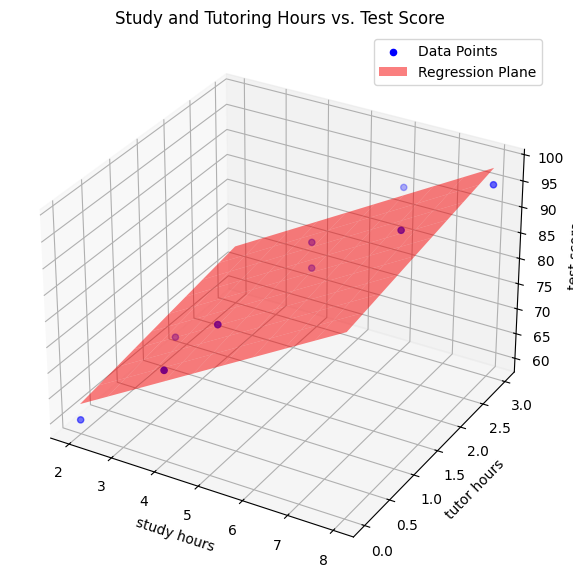

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 데이터 점 산점도
ax.scatter(study_hours, tutor_hours, test_scores, color='blue', label='Data Points')

# 회귀 평면 생성
# X1, X2 범위의 격자 생성
x1_range = np.linspace(min(study_hours), max(study_hours), 10)
x2_range = np.linspace(min(tutor_hours), max(tutor_hours), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# 회귀 평면의 Z 값(예측 점수) 계산
y_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid

# 회귀 평면 그리기
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5, label='Regression Plane')

# 축 라벨 설정
ax.set_xlabel('study hours')
ax.set_ylabel('tutor hours')
ax.set_zlabel('test score')
ax.set_title('Study and Tutoring Hours vs. Test Score')

# 범례 추가
ax.legend()

# 그래프 표시
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


회귀 계수:
X1: 1.7882
X2: 2.9284
X3: 1.5135

절편: 0.1535

R-squared 값: 0.9566
평균제곱근오차(RMSE): 0.7174


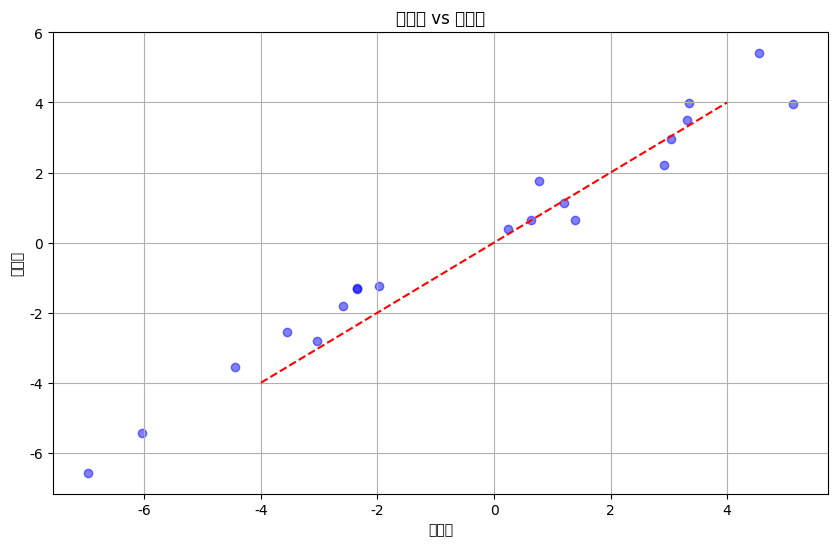


새로운 데이터 예측값: 3.2192


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# 샘플 데이터 생성
np.random.seed(42)
n_samples = 100  # 생성할 난수 크기

# 독립변수 생성
X1 = np.random.normal(0, 1, n_samples)   # np.random.normal(평균, 표준편차, 생성할 난수 크기)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)

# 종속변수 생성 (Y = 2X1 + 3X2 + 1.5X3 + 오차)
Y = 2 * X1 + 3 * X2 + 1.5 * X3 + np.random.normal(0, 1, n_samples)

# 데이터프레임 생성
data = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'Y': Y
})

# 학습용과 테스트용 데이터 분리
X = data[['X1', 'X2', 'X3']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 출력
print("회귀 계수:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\n절편: {model.intercept_:.4f}")
print(f"\nR-squared 값: {r2_score(y_test, y_pred):.4f}")
print(f"평균제곱근오차(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5) # alpha(투명도) : 0(투명), 0.5(반투명), 1(완전 불투명)
plt.plot([-4, 4], [-4, 4], 'r--')  # X축 [-4, 4], Y축 [-4, 4]: 이 부분은 선의 시작점과 끝점을 정의 r-- : red색 -- 점선으로 표시
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값')
plt.grid(True)
plt.show()

# 새로운 데이터로 예측 예시
new_data = np.array([[0.5, 1.0, -0.5]])
prediction = model.predict(new_data)
print(f"\n새로운 데이터 예측값: {prediction[0]:.4f}")

## 선형회귀 추가학습

### 사전학습(iloc 함수)

In [ ]:
# iloc : 정수 위치 기반 (인덱스 방식)
# 사전설치 : pip install pandas
import pandas as pd

data = {'col1': [10, 20, 30, 40],
        'col2': [100, 200, 300, 400],
        'col3': ['A', 'B', 'C', 'D']}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
print(df)

   col1  col2 col3
0    10   100    A
1    20   200    B
2    30   300    C
3    40   400    D


In [ ]:
# 첫 번째 행 선택
print(df.iloc[0])

col1     10
col2    100
col3      A
Name: 0, dtype: object


In [ ]:
# 두 번째 행, 첫 번째 열 선택
print(df.iloc[1, 0])  # 행 인덱스 1, 열 인덱스 0

20


In [ ]:
# 첫 번째부터 세 번째 행까지, 처음 두 열 선택 (0, 1)
print(df.iloc[0:3, 0:2]) # 슬라이싱: 끝 인덱스(3, 2)는 포함 X

   col1  col2
0    10   100
1    20   200
2    30   300


### 사전학습(loc 함수)

In [ ]:
# loc 함수 : 레이블 이름 기반
data = {'col1': [10, 20, 30, 40],
        'col2': [100, 200, 300, 400],
        'col3': ['A', 'B', 'C', 'D']}

In [ ]:
df = pd.DataFrame(data, index=['a', 'b', 'c', 'd']) # 명시적인 인덱스 설정

In [ ]:
print(df)

   col1  col2 col3
a    10   100    A
b    20   200    B
c    30   300    C
d    40   400    D


In [ ]:
# 인덱스 'a' 행 선택
print(df.loc['a'])

col1     10
col2    100
col3      A
Name: a, dtype: object


In [ ]:
# 인덱스 'b' 행, 'col1' 열 선택
print(df.loc['b', 'col1'])

20


In [ ]:
# 인덱스 'a'부터 'c'까지 행, 'col1'과 'col2' 열 선택
print(df.loc['a':'c', 'col1':'col2']) # 슬라이싱: 끝 인덱스('c', 'col2') 포함

   col1  col2
a    10   100
b    20   200
c    30   300


### 선형회귀

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('./dataset/LinearRegressionData.csv')

In [ ]:
dataset.head()

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

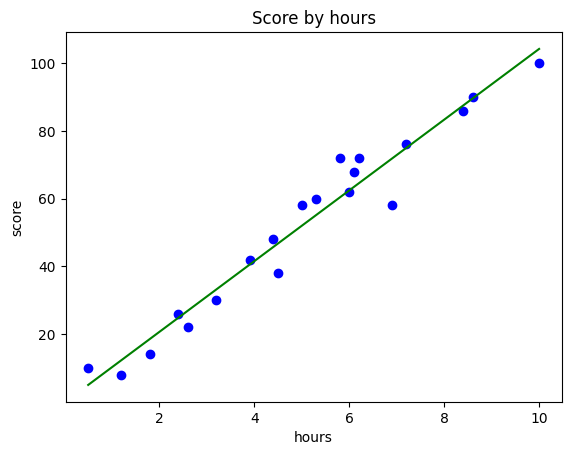

In [ ]:
plt.scatter(X,y, color='blue')
plt.plot(X, y_pred, color='green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
print('9 시간 공부 시 예상점수:', reg.predict([[9]]))

9 시간 공부 시 예상점수: [93.77478776]


In [ ]:
reg.coef_ #기울기(m)

array([10.44369694])

In [ ]:
reg.intercept_ #y절편(b)

-0.218484702867201

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('./dataset/LinearRegressionData.csv')
dataset

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22
5,3.20,30
6,3.90,42
7,4.40,48
8,4.50,38
9,5.00,58


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [ ]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [ ]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [ ]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [ ]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [ ]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

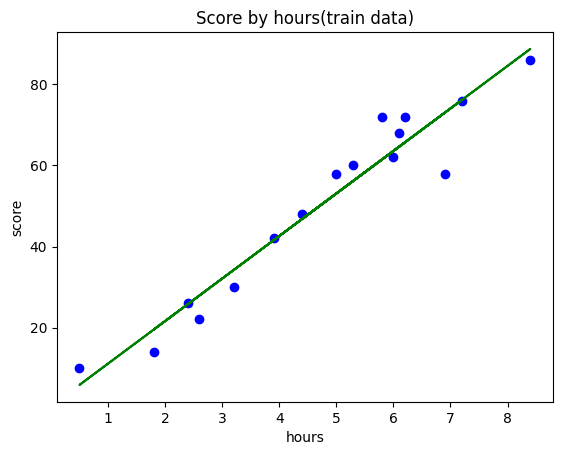

In [ ]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

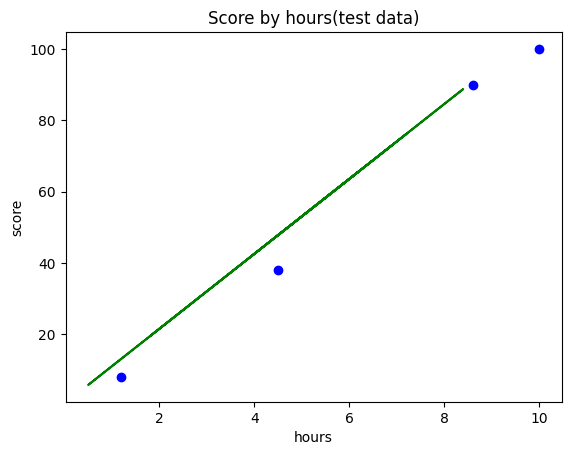

In [ ]:
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
reg.coef_

array([10.49161294])

In [ ]:
reg.intercept_

0.6115562905169369

In [ ]:
reg.score(X_test, y_test)    # score : 결정계수를 출력하는 함수

0.9727616474310156

### 다항회귀

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

R-squared: 0.9755
공부 시간 3.8시간에 대한 예측 성적: 50.7


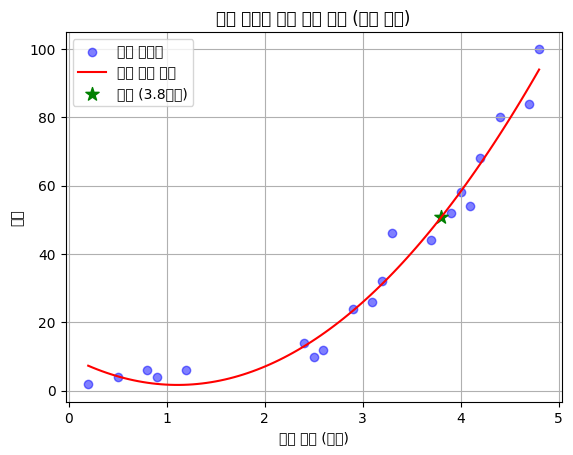

In [ ]:
# 다항 회귀
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline  # 여러 단계를 순서대로 처리 및 연결(ex. 다항 특성변환과 선형회귀 순서대로 적용)

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# CSV 파일 읽기
dataset = pd.read_csv('./dataset/PolynomialRegressionData.csv')

# 데이터 준비
X = dataset['hour'].values.reshape(-1, 1)  # 공부 시간 (독립 변수)
y = dataset['score'].values  # 성적 (종속 변수)

# 다항 회귀 모델 생성 (2차 다항식)
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X, y)

# 모델 성능 평가 (R-squared)
r_squared = polyreg.score(X, y)
print(f"R-squared: {r_squared:.4f}")

# 새로운 데이터로 예측 (공부 시간 3.8시간)
new_hours = np.array([[3.8]])
predicted_score = polyreg.predict(new_hours)
print(f"공부 시간 3.8시간에 대한 예측 성적: {predicted_score[0]:.1f}")

# 시각화
# 데이터 포인트 산점도
plt.scatter(X, y, color='blue', alpha=0.5, label='실제 데이터')

# 다항 회귀 곡선 그리기
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)  # 부드러운 곡선을 위해 범위 생성, reshape(-1, 1) scikit-learn은 2차원 배열로 표현 (samples, features)
y_pred = polyreg.predict(X_range)
plt.plot(X_range, y_pred, color='red', label='다항 회귀 곡선')

# 예측 데이터 포인트 표시
plt.scatter(new_hours, predicted_score, color='green', s=100, marker='*', label='예측 (3.8시간)')

# 그래프 설정
plt.xlabel('공부 시간 (시간)')
plt.ylabel('성적')
plt.title('공부 시간에 따른 성적 예측 (다항 회귀)')
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

## 경사하강법 예제

In [ ]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1) # max_iter : 모델 학습 횟수, eta0 : 학습율(1e-4: 0.0001), versbose=1 학습결과출력
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=200, random_state=0, verbose=1)

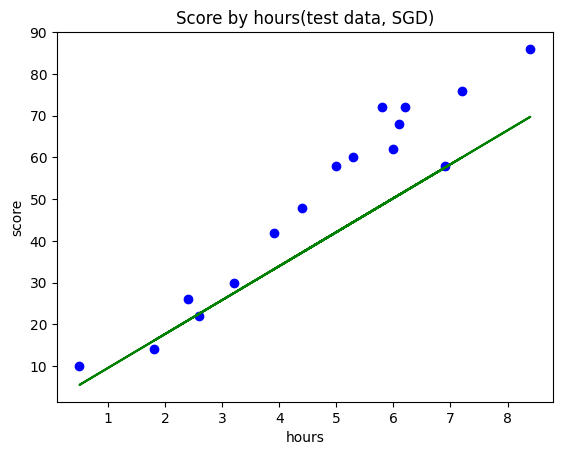

In [ ]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
sr.coef_, sr.intercept_

(array([8.13259556]), array([1.433206]))

In [ ]:
sr.score(X_test, y_test)    # score : 결정계수를 출력하는 함수

0.884872663907813

In [ ]:
sr.score(X_train, y_train)

0.6837363504701681

## 로지스틱 회귀 들어가기 전에 (shape 변경 예제)

In [ ]:
import numpy as np

# 2차원 배열 생성
p = np.array([[1, 2, 3], [4, 5, 6]])
print("Original array:\n", p)
print("Shape:", p.shape)

Original array:
 [[1 2 3]
 [4 5 6]]
Shape: (2, 3)


In [ ]:
# reshape(-1) 적용
p = p.reshape(-1)
print("\nReshaped array:\n", p)
print("Shape:", p.shape)


Reshaped array:
 [1 2 3 4 5 6]
Shape: (6,)


In [ ]:
# reshape(-1, 2) 적용
p = p.reshape(-1, 2)
print("\nReshaped array:\n", p)
print("Shape:", p.shape)


Reshaped array:
 [[1 2]
 [3 4]
 [5 6]]
Shape: (3, 2)


In [ ]:
# reshape(3, -1) 적용
p = p.reshape(-1, 2)
print("\nReshaped array:\n", p)
print("Shape:", p.shape)


Reshaped array:
 [[1 2]
 [3 4]
 [5 6]]
Shape: (3, 2)


##로직스틱회귀 추가학습 예제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('./dataset/LogisticRegressionData.csv')
dataset.head()


,hour,pass
0,0.5,0
1,1.2,0
2,1.8,0
3,2.4,0
4,2.6,0


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
classifier.predict([[6]])

array([1])

In [ ]:
classifier.predict_proba([[6]]) # predict_proba : 각 클래스에 속할 확률(분류에 사용)

array([[0.141483, 0.858517]])

In [ ]:
classifier.predict([[4]])

array([0])

In [ ]:
classifier.predict_proba([[4]])

array([[0.62497682, 0.37502318]])

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [ ]:
y_test

array([1, 0, 1, 0])

In [ ]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [ ]:
# 정확도 반환
classifier.score(X_test, y_test)

0.75

In [ ]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

<ipython-input-52-1a3c1c30d8b3>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [ ]:
p = 1/(1+ np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
p

array([[0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

In [ ]:
X_range.shape

(95,)

In [ ]:
p = p.reshape(-1)
p.shape

(95,)

위의 reshape 예시
arr = np.array([[1, 2, 3],
              [4, 5, 6]])

(2, 3) 형태의 배열을 (6,) 형태의 1차원 배열로 변환
arr_reshaped = arr.reshape(-1)
print(arr_reshaped)  # 출력: [1 2 3 4 5 6]

(2, 3) 형태의 배열을 (3, 2) 형태의 배열로 변환
arr_reshaped = arr.reshape(3, -1)
print(arr_reshaped)  # 출력: [[1 2], [3 4],[5 6]]
즉, 3개의 행을 만들고, 나머지 열의 개수는 원래 배열의 크기에 맞춰 자동으로 계산하라"는 의미가 됨

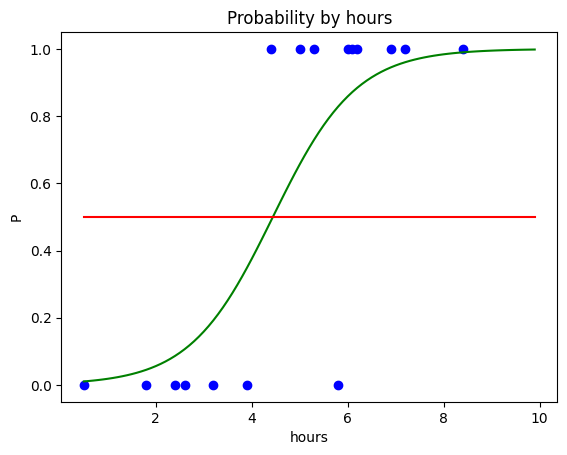

In [ ]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # y축에 일정한 값인 0.5를 유지하는 직선
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

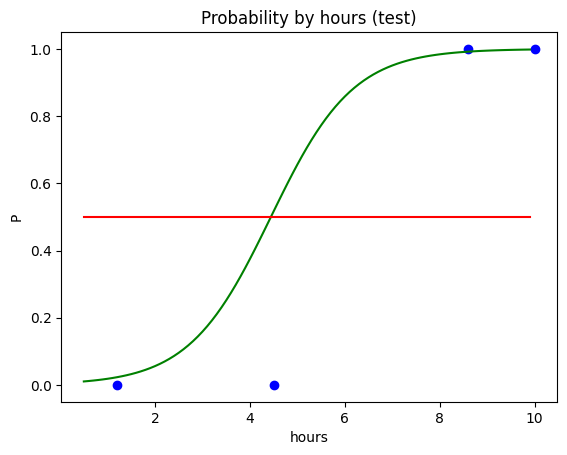

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')  # y축에 일정한 값인 0.5를 유지하는 직선
plt.title('Probability by hours (test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

#분류

## KNN(K Nearest Neighbors)

In [ ]:
# 붓꽃(Iris) 품종 : Setosa, Versicolor, Viginica
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [ ]:
# 1. 데이터 준비
iris = load_iris()
X = iris.data  # 특징 (꽃잎, 꽃받침 길이/너비)
y = iris.target  # 품종 (0: Setosa, 1: Versicolor, 2: Virginica)
feature_names = iris.feature_names # 특징 이름 가져오기
target_names = iris.target_names # target 이름 가져오기

In [ ]:
# Pandas DataFrame 생성 및 출력
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y  # 품종 레이블 추가
df['target_name'] = df['target'].apply(lambda x: target_names[x])  # 품종 이름 추가

print("Iris Data (Head 5):")
print(df.head())
print("\n")

Iris Data (Head 5):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  




In [ ]:
# 2. 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# test_size=0.3: 테스트 데이터 30%, 훈련 데이터 70%로 분리
# random_state=42: 재현성을 위해 난수 시드 고정

In [ ]:
# 3. KNN 모델 생성 및 학습
k = 5  # K 값 설정 (이웃의 수)
knn = KNeighborsClassifier(n_neighbors=k) # 모델 생성
knn.fit(X_train, y_train) # 훈련 데이터로 모델 학습

KNeighborsClassifier()

In [ ]:
# 4. 테스트 데이터로 예측
y_pred = knn.predict(X_test) # 테스트 데이터에 대한 예측 수행

In [ ]:
# 5. 모델 평가
accuracy = accuracy_score(y_test, y_pred) # 정확도 계산
print(f"Accuracy: {accuracy:.4f}") # 결과 출력

Accuracy: 1.0000


In [ ]:
# 6. 새로운 데이터에 대한 예측 (선택 사항)
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # 새로운 데이터 (꽃잎, 꽃받침 길이/너비)
prediction = knn.predict(new_data)
print(f"New data prediction: {iris.target_names[prediction[0]]}") # 예측 결과 출력

New data prediction: setosa


##의사결정나무

In [ ]:
# 붓꽃(Iris) 품종 : Setosa, Versicolor, Viginica
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
# Pandas DataFrame 생성
df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y
df['target_names'] = [target_names[i] for i in y] # target 이름 추가

In [ ]:
# 데이터프레임 출력 (처음 5행)
print("DataFrame Sample:")
print(df.head())
# print(df.tail())

DataFrame Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  


In [ ]:
# 데이터 분할 (훈련 세트 80%, 테스트 세트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 의사결정 트리 모델 생성 (모델 파라미터 튜닝 가능)
clf = DecisionTreeClassifier(max_depth=3, random_state=42) # max_depth(나무의 최대깊이) 조절

# 모델 학습
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# 테스트 데이터로 예측
y_pred = clf.predict(X_test)

In [ ]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [ ]:
# 분류 보고서
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



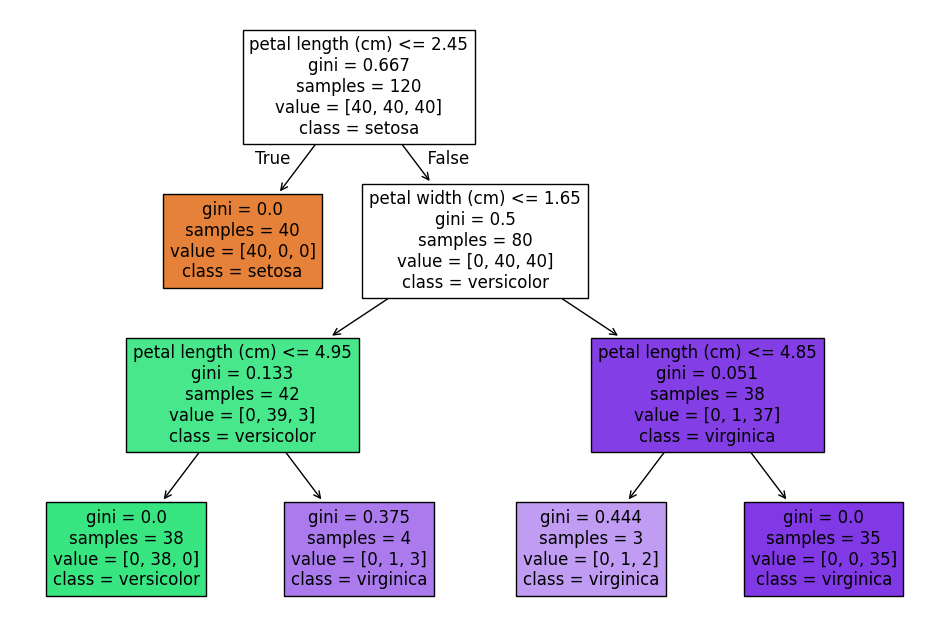

In [ ]:
# 의사결정 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()

## 랜덤포레스트

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# GridSearchCV: 모든 하이퍼파라미터 조합을 체계적으로 탐색하면서 교차검증을 통해 최적의 모델을 찾는 클래스
# vs. RandomizedSearchCV, HalvingGridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Confusion matrix 시각화를 위해 추가

In [8]:
# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [9]:
# Pandas DataFrame 생성
df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y
df['target_names'] = [target_names[i] for i in y] # target 이름 추가

In [10]:
# 데이터프레임 출력 (처음 5행)
print("DataFrame Sample:")
print(df.head())

DataFrame Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  


In [ ]:
# 데이터 분할 (훈련 세트 80%, 테스트 세트 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # stratify: 레이블 분포를 유지하면서 데이터를 분할
)
# 층화 추출(stratified sampling)
# y(정답 레이블)의 클래스 비율을 훈련 세트와 테스트 세트에 동일하게 유지

In [ ]:
# Random Forest 모델 생성
# 하이퍼파라미터 튜닝을 위해 GridSearchCV 사용
param_grid = {
    # 하이퍼라파미터 네 종류
    'n_estimators': [50, 100, 200],  # 트리의 개수
    'max_depth': [4, 6, 8],       # 트리의 최대 깊이
    'min_samples_split': [2, 4],  # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2]    # 리프 노드에 있어야 하는 최소 샘플 수
}

In [13]:
rf_model = RandomForestClassifier(random_state=42)  # Random Forest 모델 초기화
# 교차 검증 cv =3 : 훈련 데이터를 3개의 FOLD(묶음)으로 나누어서 두개를 훈련, 나머지는 검증 용도로 활용
# 교차 검증은 최적의 하이퍼 파라미터 값을 찾기 위해서 사용됨
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

In [14]:
# 모델 학습 (GridSearchCV를 통한 최적의 파라미터를 반영한 학습)
grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [4, 6, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 4], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [15]:
# 최적의 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [16]:
# 최적의 모델 저장
best_rf_model = grid_search.best_estimator_

In [ ]:
# 테스트 데이터로 예측 (하이퍼 파라미터 튜닝을 통해 최적회된 상태로 예측이 이루어짐)
y_pred = best_rf_model.predict(X_test)

In [ ]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [ ]:
# 분류 보고서
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



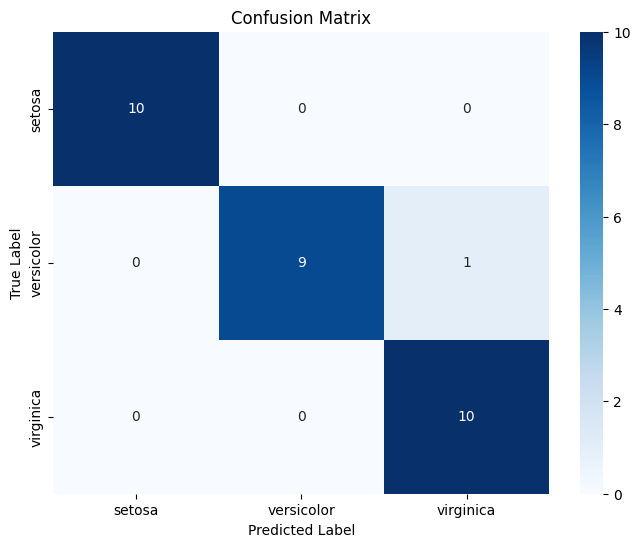

In [ ]:
# 혼동 행렬 (Confusion Matrix) 시각화
# 지도 학습으로 훈련된 분류 알고리즘의 성능을 시각화 할 수 있는 표
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
# annot=True : 각 셀안의 숫자값을 표시, fmt="d" : 숫자값을 정수형태로 표시, cmap="Blues" : 색상값은 블루
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

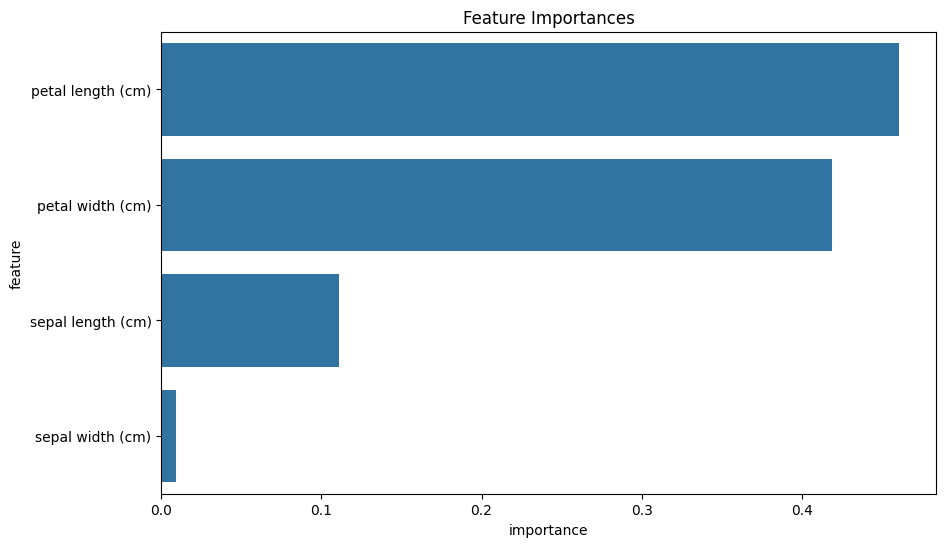

In [ ]:
# Feature Importance 시각화
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

# Feature Importance
# 머신러닝 모델이 예측 결과를 만들 때 각 특성(Feature)이 
# 얼마나 중요한 역할을 했는지를 수치로 나타낸 것
# - RandomForest, XGBoost, LightGBM (노드 분할 시 Gini 감소량, 정보 이득 기반)
# - Tree 기반 모델 (매우 직관적이고 해석 가능)

## 나이브 베이즈(Naive Bayes) : 텍스트 분류 문제에서 매우 효과적

In [ ]:
# 스팸분류 예제
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  # 텍스트 데이터를 숫자로 변환 (TF-IDF 벡터화)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 1. 데이터 불러오기
data = pd.read_csv('./dataset/spam.csv', encoding='ISO-8859-1')  # encoding 방식 : utf-8(범용성), ISO-8859-1(서유럽), CP949(한글)

# 데이터 내용 미리보기 (처음 5개 행 출력)
print("Spam Data (First 5 rows):")
print(data.head())
print("\n")


data = data[['v1', 'v2']]  # 필요한 열만 선택
data.columns = ['label', 'text']  # 열 이름 변경

Spam Data (First 5 rows):
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  




In [ ]:
# 2. 데이터 전처리
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # 레이블을 숫자로 변환, map함수: 열의 각 값을 다른 값으로 변환하는 데 사용
data.dropna(inplace=True)  # 결측치 제거

In [ ]:
# 3. 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [ ]:
# 4. TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words='english') # stop_words: 불필요한 영어 단어(예: "the", "is", "and" 등)를 자동으로 제거
X_train_tfidf = vectorizer.fit_transform(X_train)   # fit: 학습 데이터의 중요한 통계정보(단어빈도수)학습, transform: 숫자 벡터로 변환
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# 5. 모델 학습
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# 6. 예측 및 평가
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [ ]:
# 7. 샘플 테스트
sample_text = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now!",
               "Congratulations! You've been selected to receive a free iPhone 15. Click to claim now!",
               "Hey, are we meeting for lunch tomorrow?"]
sample_tfidf = vectorizer.transform(sample_text)
predictions = model.predict(sample_tfidf)
for text, label in zip(sample_text, predictions):
    print(f"Text: {text} => {'Spam' if label == 1 else 'Ham'}")

Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now! => Spam
Text: Congratulations! You've been selected to receive a free iPhone 15. Click to claim now! => Spam
Text: Hey, are we meeting for lunch tomorrow? => Ham


## SVM(support vector machine)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 1. 데이터 불러오기
data = pd.read_csv('./dataset/spam.csv', encoding='ISO-8859-1')
data = data[['v1', 'v2']]  # 필요한 열만 선택
data.columns = ['label', 'text']  # 열 이름 변경

In [ ]:
# 2. 데이터 전처리
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # 레이블을 숫자로 변환
data.dropna(inplace=True)  # 결측치 제거

In [ ]:
# 3. 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [ ]:
# 4. TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# 5. SVM 모델 학습
model = SVC(kernel='linear', random_state=42)  # SVM 모델 생성 (linear : 직선, 평면, 초평면)
model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# 6. 예측 및 평가
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.979372197309417

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
# 7. 샘플 테스트
sample_text = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now!",
    "Congratulations! You've been selected to receive a free iPhone 15. Click to claim now!",
    "Hey, are we meeting for lunch tomorrow?"
]
sample_tfidf = vectorizer.transform(sample_text)
predictions = model.predict(sample_tfidf)
for text, label in zip(sample_text, predictions):
    print(f"Text: {text} => {'Spam' if label == 1 else 'Ham'}")

Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now! => Spam
Text: Congratulations! You've been selected to receive a free iPhone 15. Click to claim now! => Spam
Text: Hey, are we meeting for lunch tomorrow? => Ham


## KNN(K 최근접 이웃)

In [ ]:
# KNN(K 최근접 이웃) 분류 예제
# iris 데이터셋 : 꽃받침(Sepal)과 꽃잎(Petal)의 길이 너비로 품종을 분류
# 필요한 라이브러리 임포트
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 데이터 표준화 (KNN은 거리 기반 알고리즘이므로 표준화 필요)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=3)  # k=3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 테스트 데이터 예측
y_pred = knn.predict(X_test)

In [ ]:
# 모델 성능 평가
print("모델 성능 평가:")
print("정확도:", accuracy_score(y_test, y_pred))
print("\n분류 보고서:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

모델 성능 평가:
정확도: 1.0

분류 보고서:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# 새로운 데이터에 대한 예측
new_samples = [
    [5.1, 3.5, 1.4, 0.2],  # Setosa
    [6.2, 3.4, 5.4, 2.3],  # Virginica
    [5.9, 3.0, 4.2, 1.5],  # Versicolor
]

new_samples = scaler.transform(new_samples)  # 표준화
predictions = knn.predict(new_samples)

In [ ]:
print("\n새로운 데이터에 대한 예측 결과:")
for i, pred in enumerate(predictions):
    print(f"샘플 {i+1}: {iris.target_names[pred]}")


새로운 데이터에 대한 예측 결과:
샘플 1: setosa
샘플 2: virginica
샘플 3: versicolor


#성능지표 분석

##MSE(Mean Squared Error, 평균제곱오차)

In [ ]:
# 실제값과 예측값 정의
actual_values = [3, -0.5, 2, 7]  # 실제값 리스트
predicted_values = [2.5, 0, 2, 8]  # 예측값 리스트

# MSE 계산
squared_errors = [(a - p) ** 2 for a, p in zip(actual_values, predicted_values)]  # 각 오차를 제곱
mse = sum(squared_errors) / len(squared_errors)  # 제곱 오차의 평균

# 결과 출력
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.375


##RMSE(Root Mean Squared Error, 평균제곱근오차)

In [ ]:
# 실제값과 예측값 정의
actual_values = [3, -0.5, 2, 7]  # 실제값 리스트
predicted_values = [2.5, 0, 2, 8]  # 예측값 리스트

# RMSE 계산
squared_errors = [(a - p) ** 2 for a, p in zip(actual_values, predicted_values)]  # 각 오차를 제곱
mse = sum(squared_errors) / len(squared_errors)  # MSE 계산
rmse = mse ** 0.5  # MSE의 제곱근을 계산하여 RMSE를 얻음

# 결과 출력
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.6123724356957945


##MAE(Mean Absolute Error, 평균절대오차)

In [ ]:
# 실제값과 예측값 정의
actual_values = [3, -0.5, 2, 7]  # 실제값 리스트
predicted_values = [2.5, 0, 2, 8]  # 예측값 리스트

# MAE 계산
absolute_errors = [abs(a - p) for a, p in zip(actual_values, predicted_values)]  # 각 오차의 절대값
mae = sum(absolute_errors) / len(absolute_errors)  # 절대 오차의 평균

# 결과 출력
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.5


##Accuracy(정확도)

In [ ]:
# 실제값과 예측값 정의
actual_values = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # 실제값 리스트 (0 또는 1)
predicted_values = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]  # 예측값 리스트 (0 또는 1)

# Accuracy 계산
correct_predictions = sum([1 for a, p in zip(actual_values, predicted_values) if a == p])  # 정확히 예측한 개수
accuracy = correct_predictions / len(actual_values)  # 전체 데이터 중 정확히 예측한 비율

# 결과 출력
print("Accuracy:", accuracy)

Accuracy: 0.8


##기타 예제

In [ ]:
import numpy as np

# 예측 값
y_pred = np.array([1.2, 0.7, 2.5])
# 실제 값
y_true = np.array([1.0, 0.5, 2.5])

# MSE 계산
def mse_loss(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

loss = mse_loss(y_true, y_pred)
print("MSE Loss:", loss)

MSE Loss: 0.026666666666666655
